<a href="https://colab.research.google.com/github/aayushkubb/DeepSpeech/blob/master/LSTM_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

# Problem Statement
Create a text classifier that can help us disambiguate Spam/Ham

# Evaluation Metrics

# Import

In [89]:
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt


#Classification Metrics
from sklearn.metrics import classification_report

#Random Module
import random

#Wordcloud
from wordcloud import WordCloud, STOPWORDS


#NLTK Tokenize
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('all')


#Counter
from collections import Counter

import re
from sklearn.model_selection import train_test_split

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

#Read the dataset

In [2]:
sms_data = pd.read_csv("/content/drive/MyDrive/Case studies/spam.csv",encoding="ISO-8859-1")
sms_data.head()

v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]

In [4]:
sms_data['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [5]:
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={"v1":"Target","v2":"SMS"})
sms_data.head()

Target                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

# Baseline Model

In [7]:
y=sms_data['Target'].apply(lambda x: 1 if x.lower()=='spam' else 0)

In [11]:
#Create a model where everything is a "ham"
y_pred=np.zeros(len(y))
print("Baseline Model -1")
print(classification_report(y,y_pred))



Baseline Model -1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.43      0.50      0.46      5572
weighted avg       0.75      0.87      0.80      5572



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -2")
print(classification_report(y,y_pred))

Baseline Model -2
              precision    recall  f1-score   support

           0       0.88      0.51      0.65      4825
           1       0.15      0.54      0.23       747

    accuracy                           0.52      5572
   macro avg       0.51      0.52      0.44      5572
weighted avg       0.78      0.52      0.59      5572



In [26]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0,0,0,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -3")
print(classification_report(y,y_pred))

Baseline Model -3
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4825
           1       0.13      0.21      0.16       747

    accuracy                           0.71      5572
   macro avg       0.50      0.50      0.50      5572
weighted avg       0.77      0.71      0.74      5572



In [27]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,1,1,1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -4")
print(classification_report(y,y_pred))

Baseline Model -4
              precision    recall  f1-score   support

           0       0.87      0.21      0.34      4825
           1       0.14      0.80      0.23       747

    accuracy                           0.29      5572
   macro avg       0.50      0.50      0.28      5572
weighted avg       0.77      0.29      0.32      5572



# Plot the Wordcloud

In [30]:
text=" ".join(sms_data['SMS'].apply(lambda x: x.lower()).tolist())


In [32]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(text)

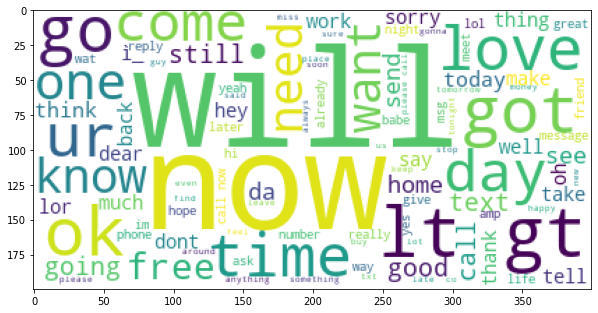

In [35]:
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

## Check WC for the SPAM/HAM dataset

In [36]:
ham_text=" ".join(sms_data[sms_data['Target']=='ham']['SMS'].apply(lambda x: x.lower()).tolist())
spam_text=" ".join(sms_data[sms_data['Target']!='ham']['SMS'].apply(lambda x: x.lower()).tolist())


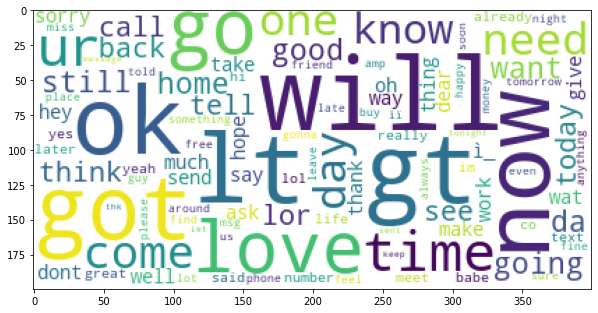

In [37]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(ham_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

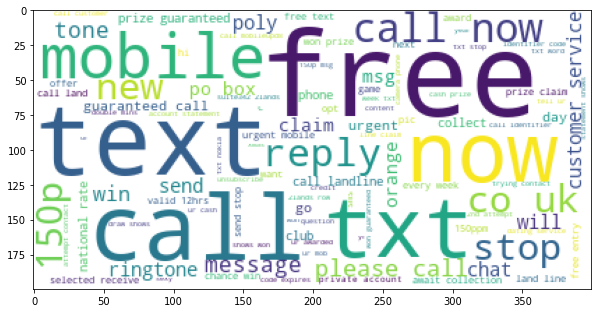

In [38]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS,).generate(spam_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

# Baseline Model using text

In [66]:
def text_classifier(sentence):
  if "free" in sentence or "call now" in sentence or "prize guaranteed" in sentence or \
  "please call" in sentence or "guaranteed call" in sentence or "customer service" in sentence:
    return 1
  else:
    return 0

In [67]:
y_pred=sms_data['SMS'].apply(lambda x : text_classifier(x))


In [68]:
print("Baseline Classifier using Text")
print(classification_report(y,y_pred))

Baseline Classifier using Text
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4825
           1       0.61      0.13      0.22       747

    accuracy                           0.87      5572
   macro avg       0.74      0.56      0.57      5572
weighted avg       0.84      0.87      0.84      5572



In [71]:
def collactions(sentences):
  bigrams = nltk.collocations.BigramAssocMeasures()
  bigramFinder = nltk.collocations.BigramCollocationFinder.from_documents(sentences)

  #bigrams
  bigram_freq = bigramFinder.ngram_fd.items()
  bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

  return bigramFreqTable




In [72]:
sentences=[word_tokenize(i) for i in sms_data['SMS'].tolist()]
collactions(sentences)

bigram  freq
333                (., I)   377
909               (&, lt)   314
913               (&, gt)   314
910               (lt, ;)   314
914               (gt, ;)   314
...                   ...   ...
21893        (call, like)     1
21894         (times, oh)     1
21895          (No, give)     1
21896  (us, hypertension)     1
48688         (its, name)     1

[48689 rows x 2 columns]

Data is not cleaned, lets first clean the dataset and then move forward

In [86]:
def character_counter(sentence_list):
  return Counter(" ".join(sentence_list))

def word_counter(sentence_list):
  word_count=[]
  for i in sentence_list:
    word_count.extend(i.split())
  return Counter(word_count)

In [85]:
Counter("My name is is ".split())

Counter({'My': 1, 'is': 2, 'name': 1})

In [76]:
character_counter(sms_data['SMS'])

Counter({'\r': 2,
         ' ': 86960,
         '!': 1381,
         '"': 265,
         '#': 287,
         '$': 23,
         '%': 10,
         '&': 916,
         "'": 1871,
         '(': 117,
         ')': 494,
         '*': 311,
         '+': 137,
         ',': 1913,
         '-': 574,
         '.': 11048,
         '/': 418,
         '0': 3186,
         '1': 1745,
         '2': 1699,
         '3': 851,
         '4': 1042,
         '5': 1067,
         '6': 801,
         '7': 856,
         '8': 1310,
         '9': 659,
         ':': 740,
         ';': 764,
         '<': 6,
         '=': 47,
         '>': 30,
         '?': 1541,
         '@': 35,
         'A': 1856,
         'B': 875,
         'C': 1389,
         'D': 1122,
         'E': 1892,
         'F': 643,
         'G': 844,
         'H': 1522,
         'I': 3462,
         'J': 299,
         'K': 388,
         'L': 1089,
         'M': 1206,
         'N': 1619,
         'O': 1811,
         'P': 960,
         'Q': 73,
         'R': 11

In [77]:
def data_preprocessing(x):
  return re.sub("[^a-zA-Z]"," ", x.lower())


In [80]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x:data_preprocessing(x))

In [82]:
character_counter(sms_data['SMS'])

Counter({' ': 124818,
         'a': 25248,
         'b': 5310,
         'c': 8876,
         'd': 11275,
         'e': 34934,
         'f': 5745,
         'g': 8284,
         'h': 14204,
         'i': 22439,
         'j': 935,
         'k': 4533,
         'l': 15757,
         'm': 10573,
         'n': 21738,
         'o': 28962,
         'p': 6811,
         'q': 236,
         'r': 17738,
         's': 18898,
         't': 27921,
         'u': 12310,
         'v': 3504,
         'w': 8462,
         'x': 1586,
         'y': 10396,
         'z': 500})

In [88]:
len(word_counter(sms_data['SMS']))

7708

In [97]:
cc=word_counter(sms_data['SMS'])

In [98]:
# cc['com']

76

# Let's prep data for training

In [90]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x: x.strip())

In [95]:
sms_data=sms_data[sms_data['SMS'].apply(lambda x: len(x)>=2)]

In [96]:
# Split data into training and test parts
train,test=train_test_split(sms_data,test_size=0.2,random_state=1)

# Model using CNN